In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [138]:
data = pd.read_csv("Iris.csv")
data.drop(["Id","Species"], axis='columns')


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [139]:
# load the dataset
data = pd.read_csv("Iris.csv")
X = data[["SepalLengthCm", "SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
#X = data[["PetalLengthCm", "PetalWidthCm"]]
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [140]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [141]:
# Initialize the K-means model
kmeans = KMeans(n_clusters=3)

# Fit the model to the data
kmeans.fit(X)

KMeans(n_clusters=3)

In [142]:
# # Get the centroids
# centroids = kmeans.cluster_centers_

# # Get the labels for each data point
# labels = kmeans.labels_

# # Create an empty list to store the distances
# distances = []

In [143]:
import numpy as np

def clustering(X, k, maximum_iter=100):

    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for i in range(maximum_iter):
        #  distances between each data point and the centroids
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids])
        w = 1/distances
        #print(distances)
        
        # s=np.sum(w, axis=0)
        # Normalize
        w = w/np.sum(w, axis=0)
        
        #print(w)
        #  data points --> cluster with the highest weight
        clusters = np.argmax(w, axis=0)

        # Update centroids
        new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(k)])
        #new_centroids = np.array([np.average(X[clusters == j], axis=0, weights=w[clusters == j]) for j in range(k)])
        # Check 
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 2 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0]
[[0.66773504 0.44310897 0.7571708  0.78205128]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.41203704 0.27690972 0.55896893 0.52083333]]


C:\Users\kunja\AppData\Local\Temp\ipykernel_30224\1414274285.py:10: RuntimeWarning: divide by zero encountered in true_divide
  w = 1/distances
C:\Users\kunja\AppData\Local\Temp\ipykernel_30224\1414274285.py:15: RuntimeWarning: invalid value encountered in true_divide
  w = w/np.sum(w, axis=0)


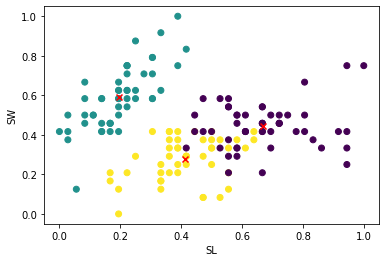

In [144]:
# Define the number of clusters
k = 3

# Run the clustering function
clusters, centroids = clustering(X, k)

# Print the cluster assignments
print(clusters)

# Print the final centroids
print(centroids)

# Plot the data points and the centroids
plt.scatter(X[:, 0], X[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.xlabel("SL")
plt.ylabel("SW")
plt.show()

In [145]:
# Get the labels for each data point
labels = kmeans.labels_

# Create an empty list to store the distances
distances = []

In [146]:
print(centroids)

[[0.66773504 0.44310897 0.7571708  0.78205128]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.41203704 0.27690972 0.55896893 0.52083333]]


In [147]:
#for comparison
centroids1 = kmeans.cluster_centers_
print(centroids1)

[[0.19611111 0.59083333 0.07864407 0.06      ]
 [0.70726496 0.4508547  0.79704476 0.82478632]
 [0.44125683 0.30737705 0.57571548 0.54918033]]


In [148]:
# centroids = np.random.rand(k, X.shape[1])

# # initialize weights as an empty array
# weights = np.zeros((X.shape[0], k))

In [149]:
# # calculate the distance between each data point and the centroids
# for i in range(20):
#     distances = np.linalg.norm(X[i] - centroids[labels[i]])

#     # assign each data point to the closest centroid
#     clusters = np.argmin(distances, axis=1)

#     # calculate the reciprocal of the distance between each data point and the centroid of the cluster
#     for j in range(k):
#         weights[clusters == j, j] = 1 / distances[clusters == j, j]

#     # calculate the weighted average of the data points in each cluster to update the centroids
#     for j in range(k):
#         if np.sum(weights[clusters == j, j]) != 0:
#             centroids[j] = np.average(X[clusters == j], axis=0, weights=weights[clusters == j, j])

In [150]:
# Calculate the distance between each data point and the centroid
for i in range(len(X)):
    distances.append(np.linalg.norm(X[i]-centroids[labels[i]]))

# Calculate the weights for each data point
weights = [1/dist for dist in distances]

# Fit the weighted K-means model
kmeans.fit(X, sample_weight=weights)

KMeans(n_clusters=3)

In [151]:
# Get the new centroids
##new centroids using kmeans
# new_centroids = kmeans.cluster_centers_

new_clusters, new_centroids = clustering(X, k)
# Get the new labels for each data point
new_labels = kmeans.labels_

C:\Users\kunja\AppData\Local\Temp\ipykernel_30224\1414274285.py:10: RuntimeWarning: divide by zero encountered in true_divide
  w = 1/distances
C:\Users\kunja\AppData\Local\Temp\ipykernel_30224\1414274285.py:15: RuntimeWarning: invalid value encountered in true_divide
  w = w/np.sum(w, axis=0)


In [152]:
# centroids = np.random.rand(k, X.shape[1])

# # initialize weights as an empty array
# weights = np.zeros((X.shape[0], k))

In [153]:
# for i in range(20):
#     # calculate the distance between each data point and the centroids
#     distances = np.linalg.norm(X[i] - centroids, axis=2)

#     # assign each data point to the closest centroid
#     clusters = np.argmin(distances, axis=1)

#     # calculate the reciprocal of the distance between each data point and the centroid of the cluster
#     for j in range(k):
#         weights[clusters == j, j] = 1 / distances[clusters == j, j]

#     # calculate the weighted average of the data points in each cluster to update the centroids
#     for j in range(k):
#         if np.sum(weights[clusters == j, j]) != 0:
#             centroids[j] = np.average(X[clusters == j], axis=0, weights=weights[clusters == j, j])

In [154]:
print(new_centroids)

[[0.44125683 0.30737705 0.57571548 0.54918033]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.70726496 0.4508547  0.79704476 0.82478632]]


In [155]:
#for comparison
new_centroids1 = kmeans.cluster_centers_
print(new_centroids)

[[0.44125683 0.30737705 0.57571548 0.54918033]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.70726496 0.4508547  0.79704476 0.82478632]]


In [187]:
# Calculate the new distances
new_distances = []
for i in range(len(X)):
    new_distances.append(np.linalg.norm(X[i]-new_centroids[new_labels[i]]))
# Find the data point with the maximum distance
max_dist = max(new_distances)

# Set lambda value
lambda_val = 0.00002


In [188]:
# Identify the clusters within the radius of range of max distance - lambda value
clusters_in_range = []
for i in range(len(X)):
    if new_distances[i] <= max_dist - lambda_val:
        clusters_in_range.append(X[i])
        print(clusters_in_range)

[array([0.22222222, 0.625     , 0.06779661, 0.04166667])]
[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667])]
[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5       , 0.05084746, 0.04166667])]
[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5       , 0.05084746, 0.04166667]), array([0.08333333, 0.45833333, 0.08474576, 0.04166667])]
[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5       , 0.05084746, 0.04166667]), array([0.08333333, 0.45833333, 0.08474576, 0.04166667]), array([0.19444444, 0.66666667, 0.06779661, 0.04166667])]
[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5   

[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5       , 0.05084746, 0.04166667]), array([0.08333333, 0.45833333, 0.08474576, 0.04166667]), array([0.19444444, 0.66666667, 0.06779661, 0.04166667]), array([0.30555556, 0.79166667, 0.11864407, 0.125     ]), array([0.08333333, 0.58333333, 0.06779661, 0.08333333]), array([0.19444444, 0.58333333, 0.08474576, 0.04166667]), array([0.02777778, 0.375     , 0.06779661, 0.04166667]), array([0.16666667, 0.45833333, 0.08474576, 0.        ]), array([0.30555556, 0.70833333, 0.08474576, 0.04166667]), array([0.13888889, 0.58333333, 0.10169492, 0.04166667]), array([0.13888889, 0.41666667, 0.06779661, 0.        ]), array([0.        , 0.41666667, 0.01694915, 0.        ]), array([0.41666667, 0.83333333, 0.03389831, 0.04166667]), array([0.38888889, 1.        , 0.08474576, 0.125     ]), array([0.30555556, 0.79166667, 0.05084746, 0.125     ]), array([0.22222222, 0.625     ,

[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5       , 0.05084746, 0.04166667]), array([0.08333333, 0.45833333, 0.08474576, 0.04166667]), array([0.19444444, 0.66666667, 0.06779661, 0.04166667]), array([0.30555556, 0.79166667, 0.11864407, 0.125     ]), array([0.08333333, 0.58333333, 0.06779661, 0.08333333]), array([0.19444444, 0.58333333, 0.08474576, 0.04166667]), array([0.02777778, 0.375     , 0.06779661, 0.04166667]), array([0.16666667, 0.45833333, 0.08474576, 0.        ]), array([0.30555556, 0.70833333, 0.08474576, 0.04166667]), array([0.13888889, 0.58333333, 0.10169492, 0.04166667]), array([0.13888889, 0.41666667, 0.06779661, 0.        ]), array([0.        , 0.41666667, 0.01694915, 0.        ]), array([0.41666667, 0.83333333, 0.03389831, 0.04166667]), array([0.38888889, 1.        , 0.08474576, 0.125     ]), array([0.30555556, 0.79166667, 0.05084746, 0.125     ]), array([0.22222222, 0.625     ,

[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5       , 0.05084746, 0.04166667]), array([0.08333333, 0.45833333, 0.08474576, 0.04166667]), array([0.19444444, 0.66666667, 0.06779661, 0.04166667]), array([0.30555556, 0.79166667, 0.11864407, 0.125     ]), array([0.08333333, 0.58333333, 0.06779661, 0.08333333]), array([0.19444444, 0.58333333, 0.08474576, 0.04166667]), array([0.02777778, 0.375     , 0.06779661, 0.04166667]), array([0.16666667, 0.45833333, 0.08474576, 0.        ]), array([0.30555556, 0.70833333, 0.08474576, 0.04166667]), array([0.13888889, 0.58333333, 0.10169492, 0.04166667]), array([0.13888889, 0.41666667, 0.06779661, 0.        ]), array([0.        , 0.41666667, 0.01694915, 0.        ]), array([0.41666667, 0.83333333, 0.03389831, 0.04166667]), array([0.38888889, 1.        , 0.08474576, 0.125     ]), array([0.30555556, 0.79166667, 0.05084746, 0.125     ]), array([0.22222222, 0.625     ,

[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5       , 0.05084746, 0.04166667]), array([0.08333333, 0.45833333, 0.08474576, 0.04166667]), array([0.19444444, 0.66666667, 0.06779661, 0.04166667]), array([0.30555556, 0.79166667, 0.11864407, 0.125     ]), array([0.08333333, 0.58333333, 0.06779661, 0.08333333]), array([0.19444444, 0.58333333, 0.08474576, 0.04166667]), array([0.02777778, 0.375     , 0.06779661, 0.04166667]), array([0.16666667, 0.45833333, 0.08474576, 0.        ]), array([0.30555556, 0.70833333, 0.08474576, 0.04166667]), array([0.13888889, 0.58333333, 0.10169492, 0.04166667]), array([0.13888889, 0.41666667, 0.06779661, 0.        ]), array([0.        , 0.41666667, 0.01694915, 0.        ]), array([0.41666667, 0.83333333, 0.03389831, 0.04166667]), array([0.38888889, 1.        , 0.08474576, 0.125     ]), array([0.30555556, 0.79166667, 0.05084746, 0.125     ]), array([0.22222222, 0.625     ,

[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5       , 0.05084746, 0.04166667]), array([0.08333333, 0.45833333, 0.08474576, 0.04166667]), array([0.19444444, 0.66666667, 0.06779661, 0.04166667]), array([0.30555556, 0.79166667, 0.11864407, 0.125     ]), array([0.08333333, 0.58333333, 0.06779661, 0.08333333]), array([0.19444444, 0.58333333, 0.08474576, 0.04166667]), array([0.02777778, 0.375     , 0.06779661, 0.04166667]), array([0.16666667, 0.45833333, 0.08474576, 0.        ]), array([0.30555556, 0.70833333, 0.08474576, 0.04166667]), array([0.13888889, 0.58333333, 0.10169492, 0.04166667]), array([0.13888889, 0.41666667, 0.06779661, 0.        ]), array([0.        , 0.41666667, 0.01694915, 0.        ]), array([0.41666667, 0.83333333, 0.03389831, 0.04166667]), array([0.38888889, 1.        , 0.08474576, 0.125     ]), array([0.30555556, 0.79166667, 0.05084746, 0.125     ]), array([0.22222222, 0.625     ,

[array([0.22222222, 0.625     , 0.06779661, 0.04166667]), array([0.16666667, 0.41666667, 0.06779661, 0.04166667]), array([0.11111111, 0.5       , 0.05084746, 0.04166667]), array([0.08333333, 0.45833333, 0.08474576, 0.04166667]), array([0.19444444, 0.66666667, 0.06779661, 0.04166667]), array([0.30555556, 0.79166667, 0.11864407, 0.125     ]), array([0.08333333, 0.58333333, 0.06779661, 0.08333333]), array([0.19444444, 0.58333333, 0.08474576, 0.04166667]), array([0.02777778, 0.375     , 0.06779661, 0.04166667]), array([0.16666667, 0.45833333, 0.08474576, 0.        ]), array([0.30555556, 0.70833333, 0.08474576, 0.04166667]), array([0.13888889, 0.58333333, 0.10169492, 0.04166667]), array([0.13888889, 0.41666667, 0.06779661, 0.        ]), array([0.        , 0.41666667, 0.01694915, 0.        ]), array([0.41666667, 0.83333333, 0.03389831, 0.04166667]), array([0.38888889, 1.        , 0.08474576, 0.125     ]), array([0.30555556, 0.79166667, 0.05084746, 0.125     ]), array([0.22222222, 0.625     ,

In [189]:
# Fit the K-means model to the clusters within the range
final_kmeans = KMeans(n_clusters=3)
final_kmeans.fit(clusters_in_range)

# Get the final labels
final_labels = final_kmeans.labels_
final_labels = final_kmeans.labels_.tolist()

print(final_labels)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2]


In [190]:
final_labels = final_kmeans.labels_
X = X[np.where(final_labels != -1)[0]]
final_labels = final_labels[np.where(final_labels != -1)[0]]


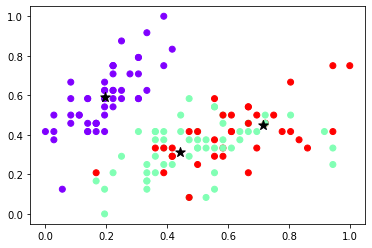

In [191]:
# Plot the clusters
plt.scatter(X[:,0], X[:,1], c=final_labels, cmap='rainbow')
plt.scatter(final_kmeans.cluster_centers_[:, 0], final_kmeans.cluster_centers_[:, 1], color='black', marker='*', s=100)
plt.show()

In [192]:
accuracy = sum([1 for i in range(len(X)) if labels[i] == final_labels[i]]) / len(X)
print(accuracy)

0.503448275862069


In [193]:
# # Calculate the accuracy
# accuracy = len(np.where(labels == final_labels)) / len(X)
# print(accuracy)

In [194]:

from sklearn.metrics import silhouette_score

score = silhouette_score(X, final_labels)
print("Silhouette Score:", score)

Silhouette Score: 0.3571470863859626


In [195]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(new_clusters, new_labels)
print('Confusion matrix:')
print(conf_matrix)

Confusion matrix:
[[28  0 33]
 [ 0 50  0]
 [39  0  0]]
